# Project: Investigate a Dataset - TMDb movie data

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> For this i choose TMDb Movies Dataset. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), it also includs user ratings and revenue. 


### Question(s) for Analysis
> Below are the questions that will be anaiysed.
   
   >Research Question 1: Which movie made the highest and lowest the profit?
    
  >Research Question 2: Which genre is the most released?
    
   >Research Question 3: How many movies are released per year?
   >Research Question 4: Which actor appear most in movies?
   
   >Research Question 5: What is the runtime of movies? 
   
   >Research Question 6: Which is the average vote distribution?


In [1]:
#set up import statements for all of the packages plan used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> The data to be analyzed will be loaded and then cleaned, by removing data not connected to the reserch questions, this will make for easy analysis. 

### General Properties

In [2]:
#Load data and print out the first 10 lines
df = pd.read_csv('tmdb-movies.csv')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
#this is the general summary of the movie data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
#shape of the dataframe:- this will show how many rows,and columns are in this data.
rows, col = df.shape

print('There are a total of {} column and {} rows in this data.'.format(col, rows))

There are a total of 21 column and 10866 rows in this data.


In [5]:
#Information on the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#check for duplicate values.
dupli = df.duplicated().sum()

print('There is {} number of duplicate value.'.format(dupli))

There is 1 number of duplicate value.


In [7]:
# check any missing data
missing = df.isnull().values.any()
print('It is {} that there are missing values in this data set.'.format(missing))

It is True that there are missing values in this data set.


In [8]:
# Total numbers of missing values for each feature
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

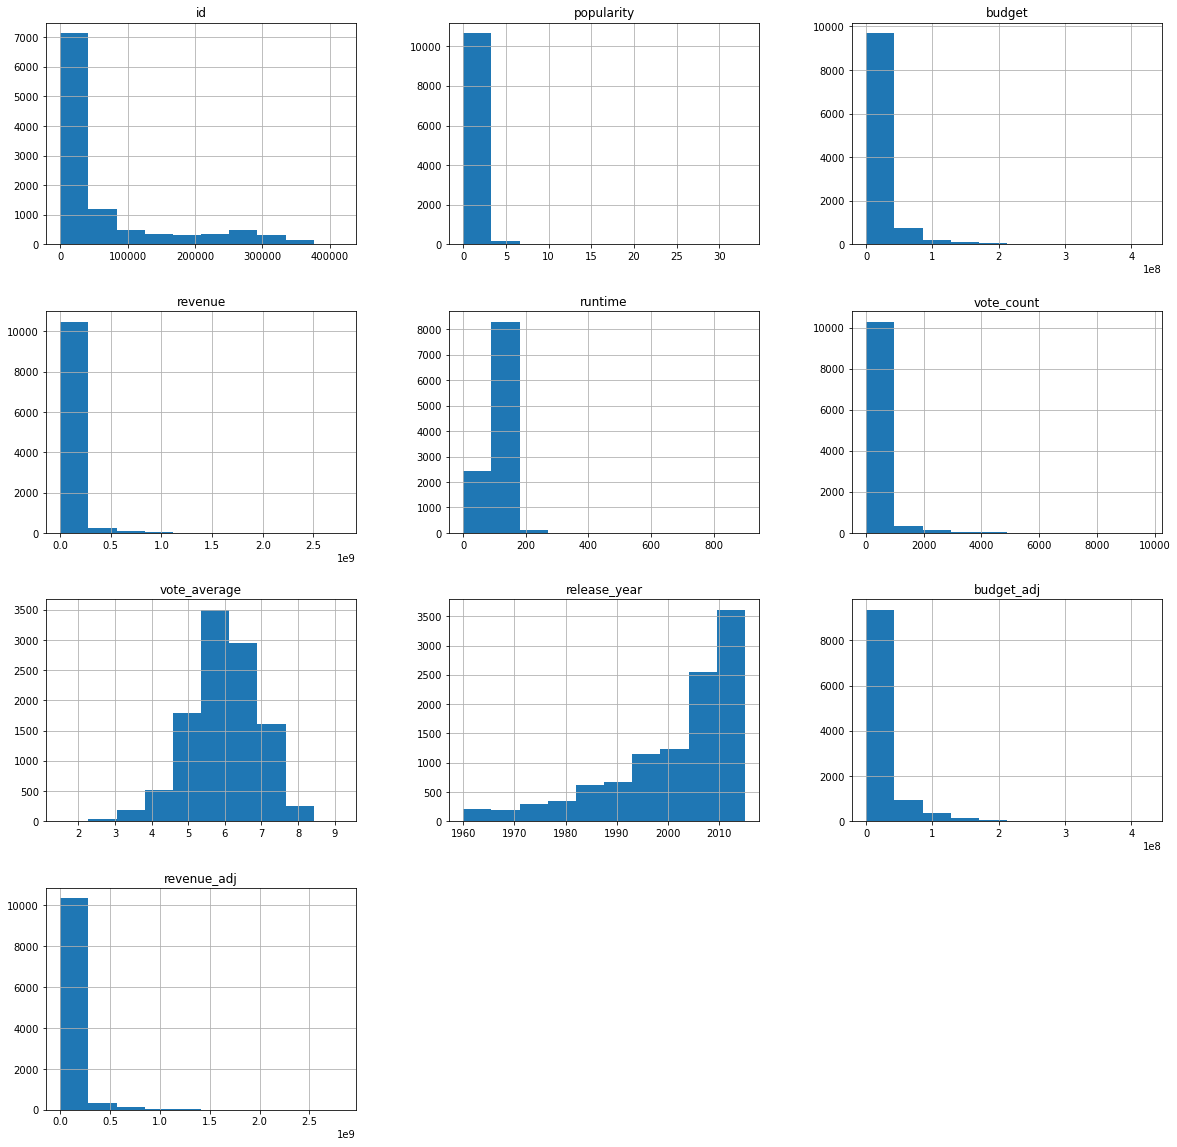

In [9]:
# Examining the data by visiualing it
df.hist(figsize=(20,20));

### Observation 
> From this data it is observed that:

1. there is only one duplicate data,
2. imdb_id, homepage, tagline,keyword and production_companies have more of missing data,
3. there are a total of 21 column and 10866 rows,
4. there are missing data and
5. null values are also in data


### Data Cleaning
> After discussing the structure of the data and any problems that need to be cleaned, the cleaning were carried out

1. remove duplicate data, 
2. drop some comlumn that are not useful the analysis,
3. convert release year to datetime format from string and
4. drop rows with missing values.

#### 1. Remove duplicate data.

In [10]:
df.drop_duplicates(keep = 'first', inplace=True)
df.duplicated().sum()

0

#### 2. Drop some comlumn that are not useful the analysis.


In [11]:
#Some data that are not needed for this analysis are to be dropped
df.drop(['imdb_id', 'homepage', 'tagline', 'overview'], axis=1, inplace=True)

#### 3. Convert release year to datetime format from string.


In [12]:
##convert  release date to datetime format from string
df['release_date'] = pd.to_datetime(df['release_date'])
type(df.release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

#### 4. Drop all row with missing values.

In [13]:
df = df.dropna()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8666 non-null   int64         
 1   popularity            8666 non-null   float64       
 2   budget                8666 non-null   int64         
 3   revenue               8666 non-null   int64         
 4   original_title        8666 non-null   object        
 5   cast                  8666 non-null   object        
 6   director              8666 non-null   object        
 7   keywords              8666 non-null   object        
 8   runtime               8666 non-null   int64         
 9   genres                8666 non-null   object        
 10  production_companies  8666 non-null   object        
 11  release_date          8666 non-null   datetime64[ns]
 12  vote_count            8666 non-null   int64         
 13  vote_average     

In [14]:
#Print the final dataset after cleaning
df.head(10)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


#### OBSERVATIONS

The data have been clean and each column now has a total of 8666 rows.

<a id='eda'></a>
## Exploratory Data Analysis

<a id='eda'></a>

### Research Question 1: Which movie made the maximum and minimum the profit?

> This is to calculate the profit made from each movie by creating a column for profit earned.


In [15]:
# to calculate the profit we need to reate a column for profit earned.
df.insert(2,'profit_earned',df['revenue']-df['budget'])
df.head()

,id,popularity,profit_earned,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,185238201,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,1868178225,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,1316249360,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
#calculate the minimum and maximum profit.
def minimum_maximum(profit):
    minimum = df[profit].idxmin()
    maximum = df[profit].idxmax()
    mini_profit = pd.DataFrame(df.loc[minimum,:])
    maxi_profit = pd.DataFrame(df.loc[maximum,:])
    
    #print out the result
    print("The movie that had the minimum profit is",df['original_title'][minimum])
    print("The movie that has the maximum profit is",df['original_title'][maximum])
    return pd.concat([maxi_profit, mini_profit],axis = 1)
    
minimum_maximum('profit_earned')

The movie that had the minimum profit is The Warrior's Way
The movie that has the maximum profit is Avatar


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
profit_earned,2544505847,-413912431
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100


##### OBSERVATIONS
It can be observed that 
column id: 1386 with name Avatar shows the highest profit earned  with 2544505847 profits and it was released in the year 2009.

Column id: 2244 with name The Warrior's Way shows the lowest earned profit with -413912431 and it was released in the year 2010

<a id='eda'></a>
### Research Question 2: Which genre is the most released?

   > Based on the data infromation, some movies can have multiple genres. The genres for each movie are seperated by '|' character. 
    For easier data exploaration, seprate the movie into groups based on the gneres.

In [17]:
#Use nunique() function to find the number of unique values in genres.
unique_genres = df.genres.nunique()
print('There are a total of {} different generes in this dataset.'.format(unique_genres))

There are a total of 1784 different generes in this dataset.


In [18]:
#split all genres 

def genere_list(G):
    split_genres = df[G].str.cat(sep = '|')
    split = pd.Series(split_genres.split('|'))
    data = split.value_counts(ascending = False)
    
    return data

In [19]:
#count the movies for all the genres and plot

data = genere_list('genres')
data.head()

Drama       3934
Comedy      3050
Thriller    2462
Action      2022
Romance     1415
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


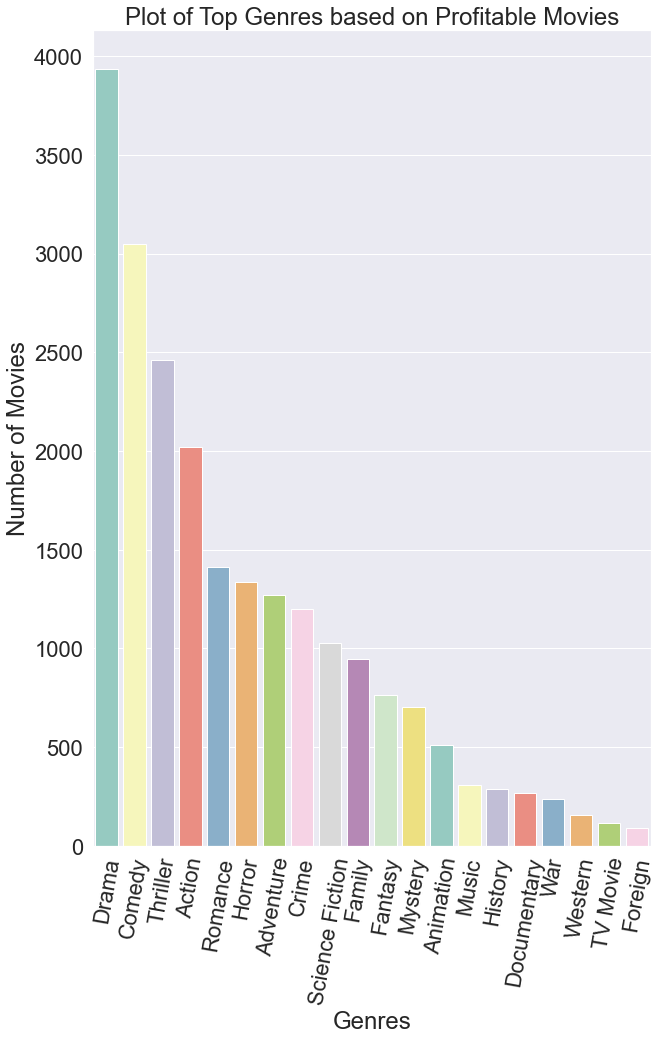

In [20]:
#ploting.

sns.set(rc={'figure.figsize':(7,10)}, font_scale=2, style="darkgrid")
plt = sns.barplot(data.index, data, palette="Set3")

#rotate x-axis' text
tick_label = plt.get_xticklabels()
for item in tick_label:
    item.set_rotation(80)
    
plt.set(ylabel='Number of Movies', xlabel='Genres', title = 'Plot of Top Genres based on Profitable Movies')
plt.figure.set_size_inches(10, 15)


#### OBSERVATION:
It can be onserved that drama is the most released with number of movies close to 4000 followed by comedy

### Research Question 3: How many movies are released per year?

Tis is a count of how many movies were released per year and a scatter plot was used to visualize the data.


In [21]:
#Total count of movies released per year.
Movies_year =df.groupby('release_year').count()['id']
Movies_year.tail()

release_year
2011    383
2012    387
2013    456
2014    520
2015    440
Name: id, dtype: int64

[Text(0.5, 0, 'movie released'),
 Text(0, 0.5, 'years of release'),
 Text(0.5, 1.0, 'Plot for Number of Movies Produced per Year')]

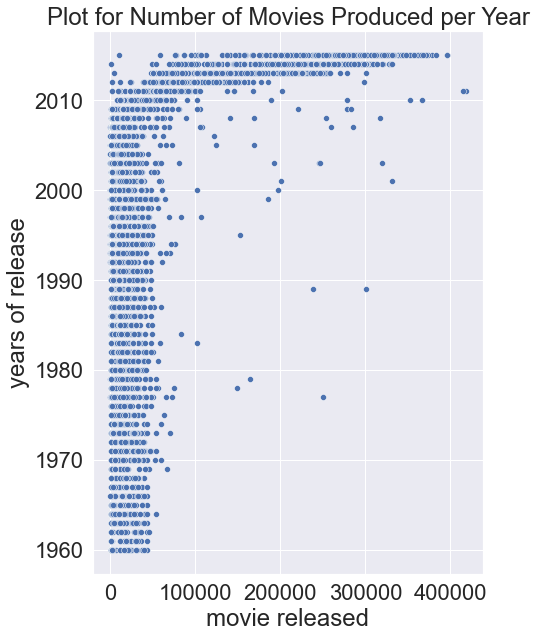

In [22]:
#movie release per year
#use scatter plot for this analysis
sns.set(style={'figure.figsize':(15,15)}, font_scale=2)

temp_df = df[["release_year", "id"]]

plt = sns.scatterplot(x = temp_df.id, y = temp_df.release_year, palette="Set3")

plt.set(xlabel='movie released', ylabel='years of release', title = 'Plot for Number of Movies Produced per Year')

##### OBSERVATIONS
This plot shows a visual of the complect distribution of the plot of number of movies released aganist the Years of Release.From the above results it can be seen that movies were released the most in year 2014 while the least year was year 1960.

### Research Question 4:  Which actor appear most in movies?

  > Based on the data infromation, it can be seen that some actors can appear in different. The actors for each movie are seperated by '|' character. The column has been splited for easier exploaration of these data to get the most appeared actor.

In [23]:
#Use nunique() function to find the number of unique values in genres.
unique_cast = df.cast.nunique()
print('There are a total of {} different actors in this dataset.'.format(unique_cast))

There are a total of 8624 different actors in this dataset.


In [24]:
#show the number of times the first 15 actors featured in different movies.
data = genere_list('cast')
data.head(15)

Robert De Niro       68
Samuel L. Jackson    65
Bruce Willis         61
Nicolas Cage         59
Michael Caine        50
Robin Williams       48
John Goodman         47
Morgan Freeman       47
Tom Hanks            46
John Cusack          46
Alec Baldwin         45
Liam Neeson          44
Julianne Moore       44
Dennis Quaid         43
Johnny Depp          43
dtype: int64

### Research Question 5: What is the runtime of the movies?

 The is the plot of runtime of movies for each year.

In [25]:
def avg_runtime(C):
    return df[C].mean()

In [26]:
average = avg_runtime('runtime')
print ('The average runtime of all the movies is {}.'.format(average))

The average runtime of all the movies is 103.81513962612509.


[Text(0.5, 0, 'Runtime of Movies'),
 Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 1.0, 'Plot for Number of Movies Runtime')]

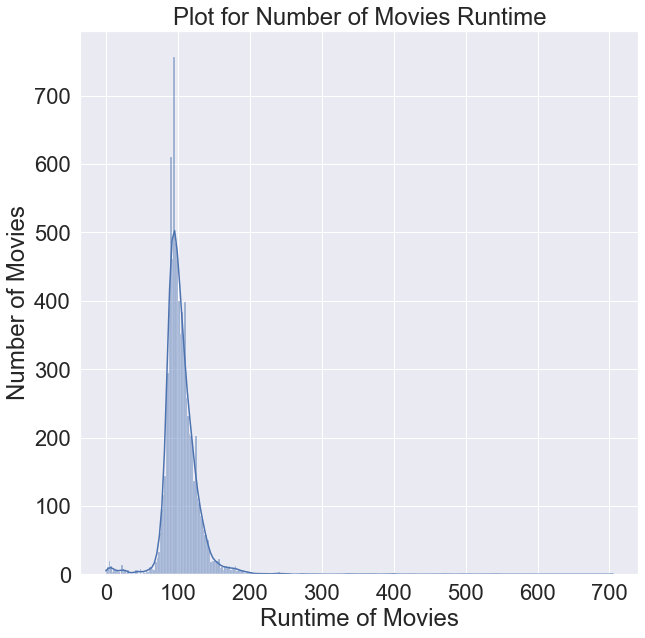

In [27]:
#plotting a histogram of runtime of movies

sns.set(rc={'figure.figsize':(10,10)}, font_scale=2, style="darkgrid")

#ploting
plt = sns.histplot(data=df, x="runtime", kde=True)
plt.set(xlabel='Runtime of Movies', ylabel='Number of Movies', title = 'Plot for Number of Movies Runtime')

#### OBSERVATIONS:
The distribution shows that the graph is a positive-skew distributions with a runtime of a little above 100 miniutes, with over 700 mivies falling in this category.

## Research Question 6: Which is the average vote distribution?

> Here a total of of the vote average distribution was calculated using a box plot and  distinct plot.

In [28]:
avg = df.vote_average.sum()
print ('The average runtime of all the movies is {} miniutes.'.format(avg))

The average runtime of all the movies is 52027.299999999996 miniutes.


#plotting a histogram of runtime of movies

sns.set(rc={'figure.figsize':(15,15)}, font_scale=2, style="darkgrid")
avg_df = df[['vote_average']]

#ploting
plt = sns.boxplot(x=avg_df.vote_average)

plt = sns.distplot(avg_df.vote_average)
plt.set(xlabel='Runtime of Movies', title = 'Plot for Number of Movies Runtime')

#### OBSERVATIONS:

> It can be seen that two plot were created, to show the rating so far with the years

> A boxplot was created  and it shows that the mean is 6.

<a id='conclusions'></a>
## Conclusions

For this analysis to be complected, i did the following:
1. to get the highest and lowest profit, a new column should be created to calculate the total profit earned from each movie. 
2. splict cells that have seperator for the calulation and ploting of data related to genres and cast.
3. a scatter plot of the number of movies released per year for clearer view.
4. a runtime of the movies agait number of movies was also ploted

##### It should also be noted that the most released genre is drama.

#### LIMITATIONS
> There were missing values in this data whicch resulted in the droping of some columns and rows.

> The budget and revenue dose not have have a currency unit attached to it. There is a high  tendency that there are discrepancies in the currency depending on the country. But for the purpose of this analysis i assumed it to be in dollar.

### list of references 
1. https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

2. https://techoverflow.net

3. https://www.geeksforgeeks.org

4. https://stackoverflow.com

5. https://www.geeksforgeeks.org/matplotlib-axes-axes-get_xticklabels-in-python/

6. https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
